In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import statsmodels.formula.api as smf
# import statsmodels.formula.api as smf
# %matplotlib inline
# #taking continues value
# from sklearn import preprocessing
# from sklearn.linear_model import LinearRegression

# Data  : 50_Startups
----
# Problem Statement

>Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

>R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [2]:
df = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A5 Multiple Linear Regression\\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


                                             |          | [  0%]   00:00 -> (? left)


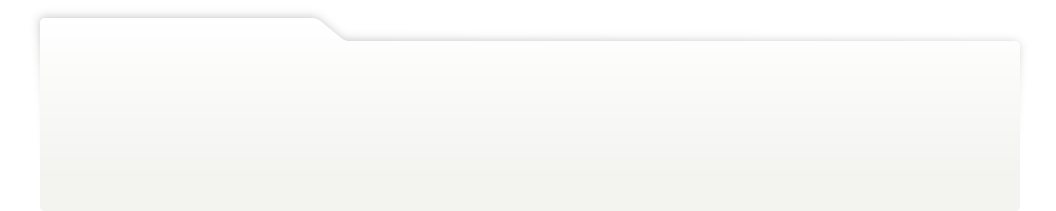
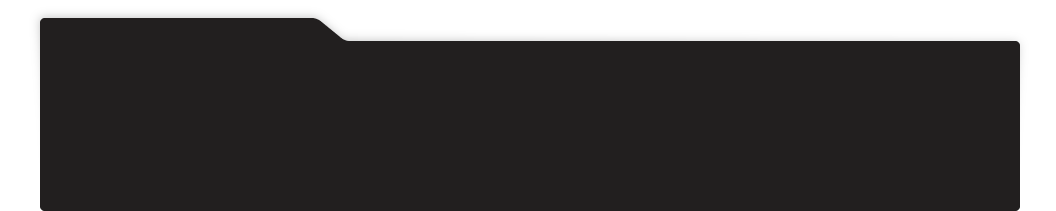
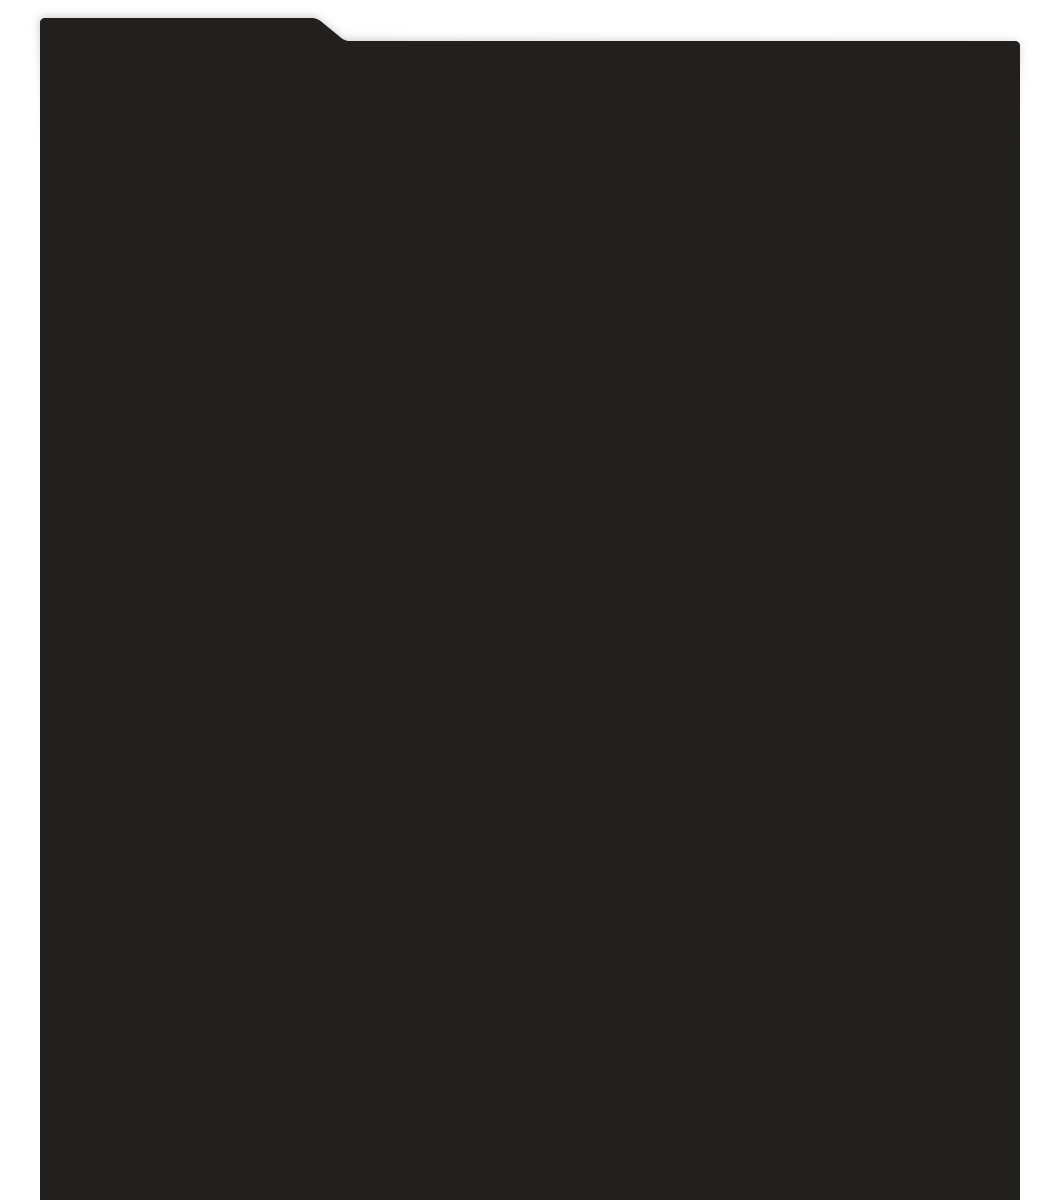
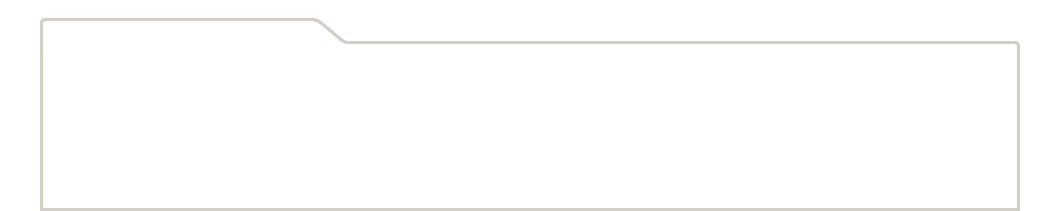
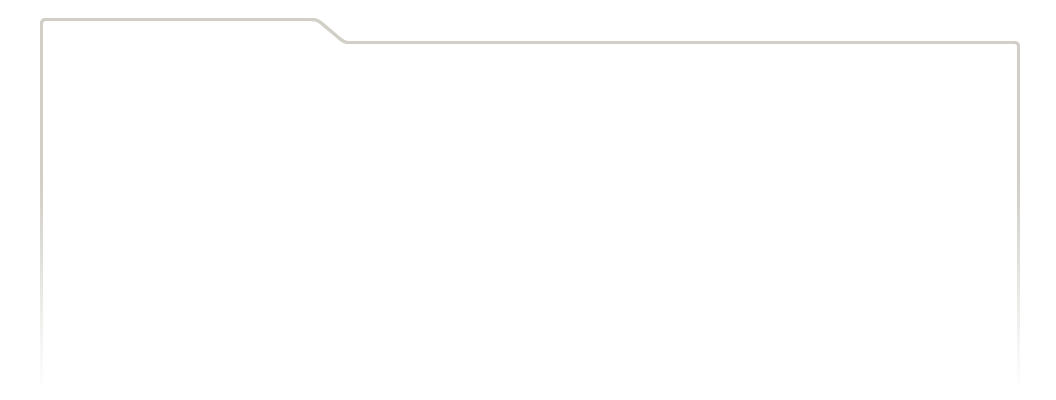
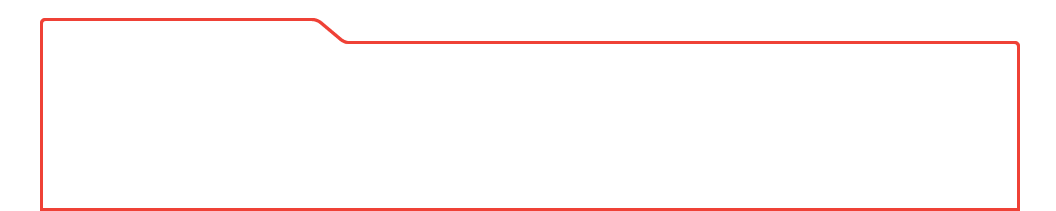
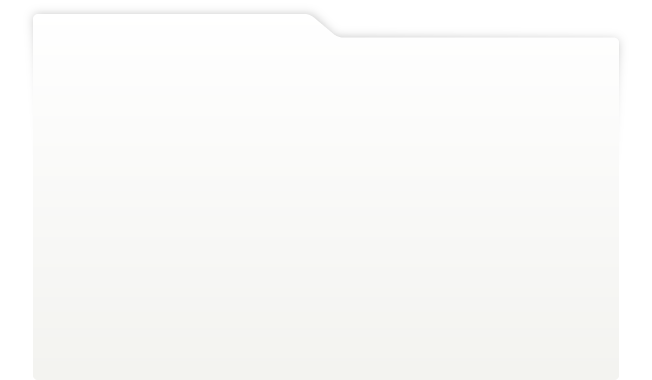
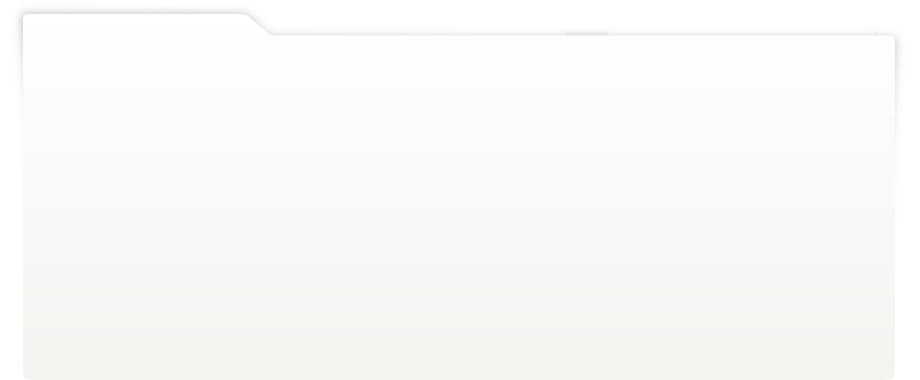
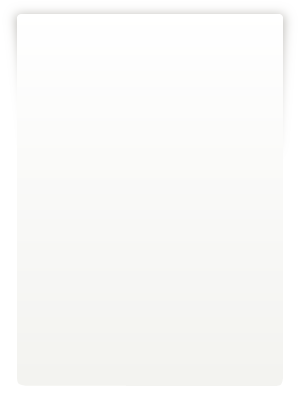
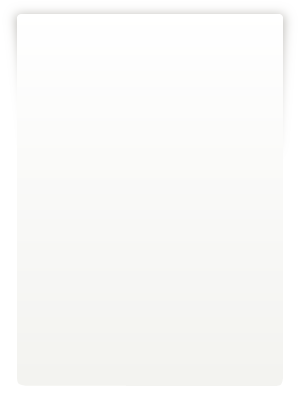
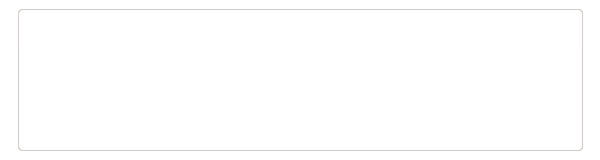
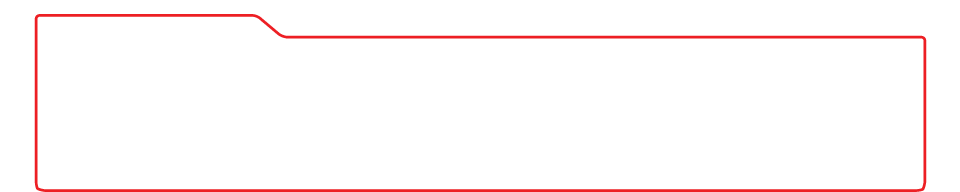
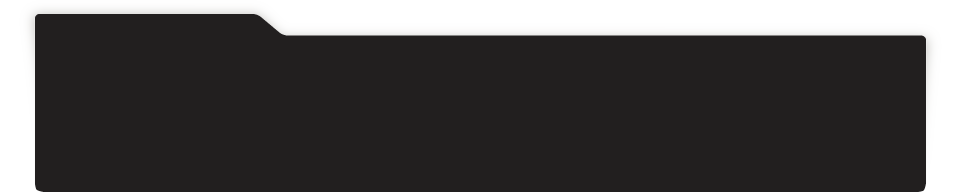
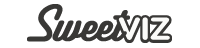
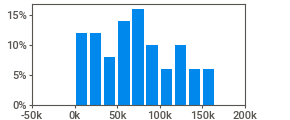
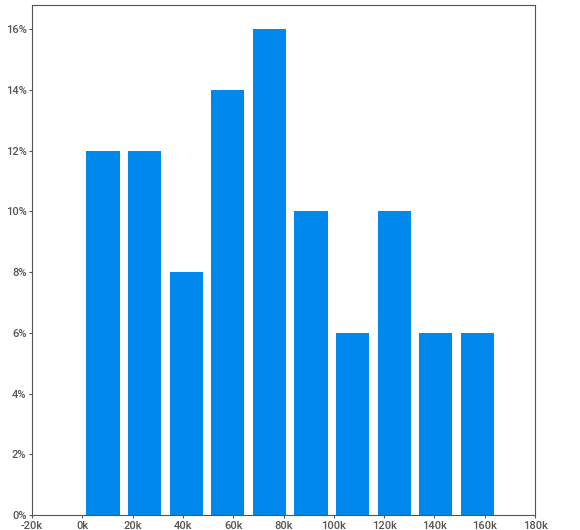
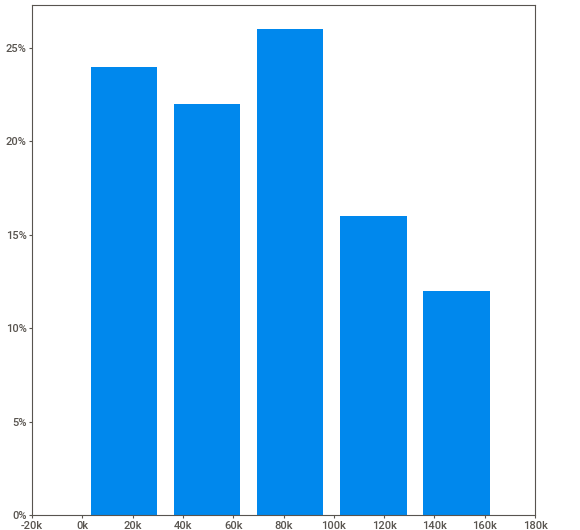
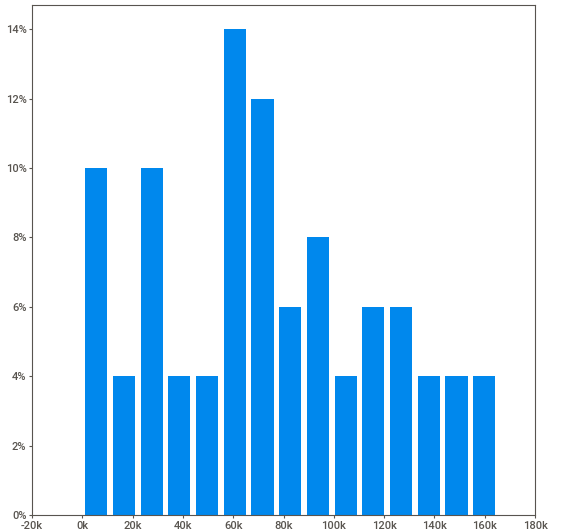
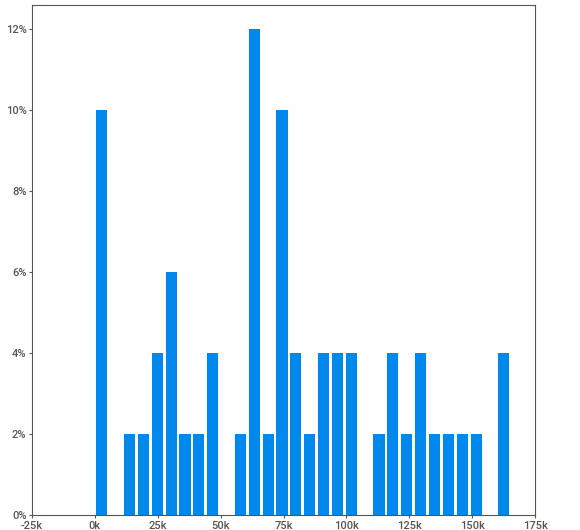
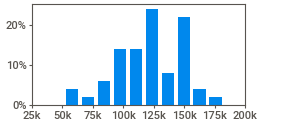
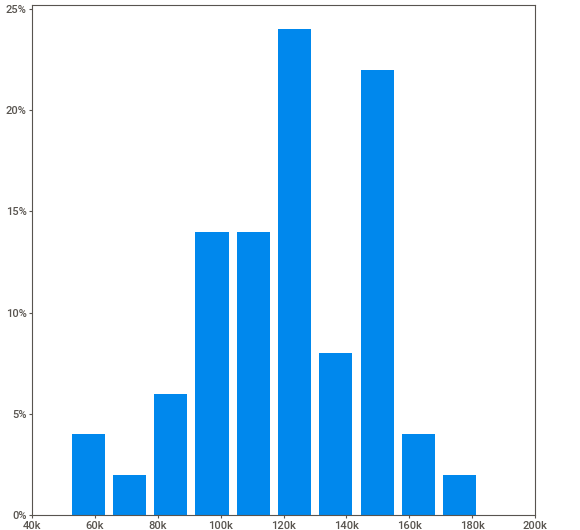
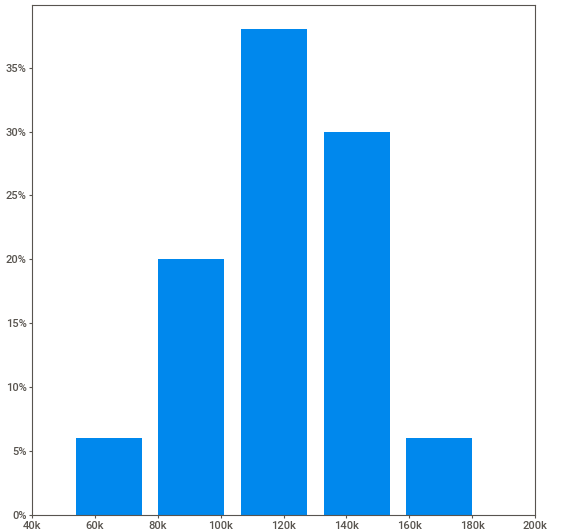
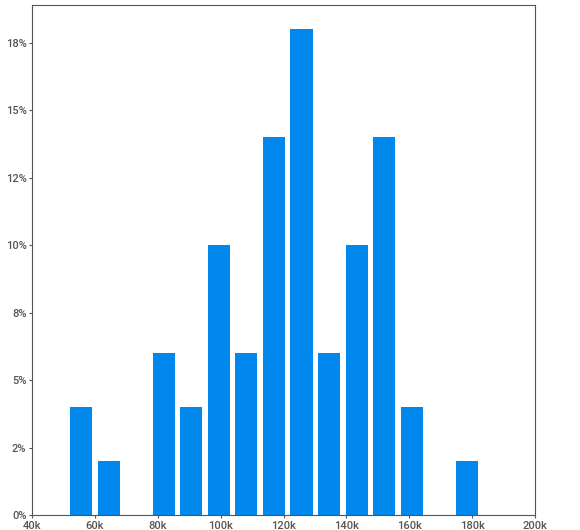
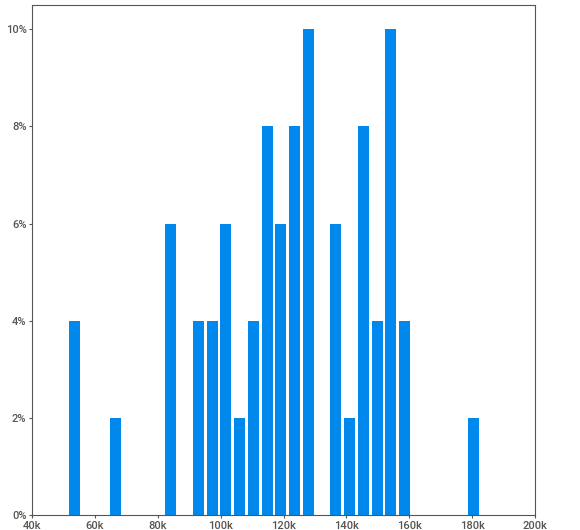
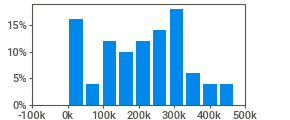
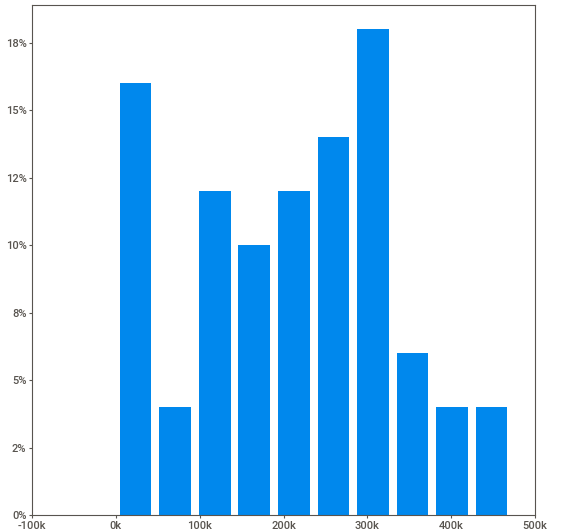
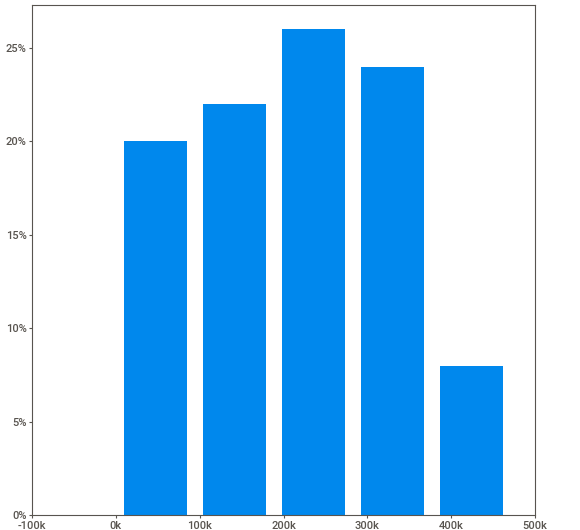
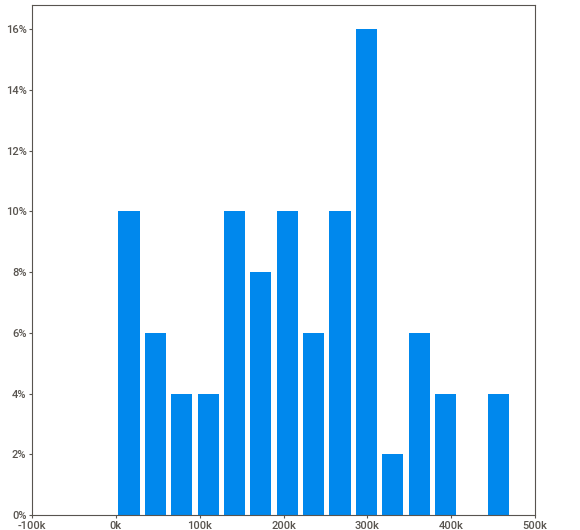
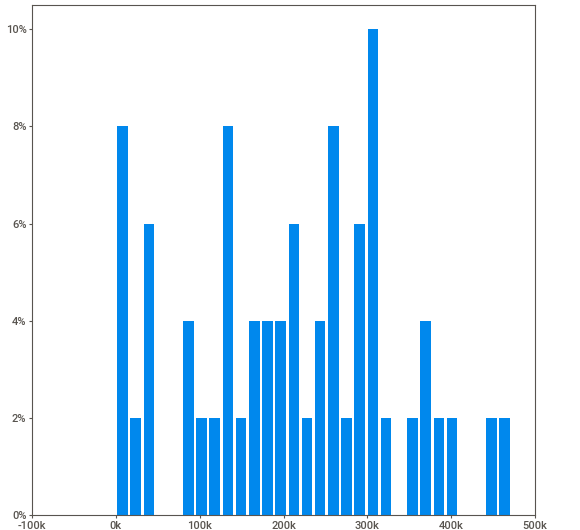
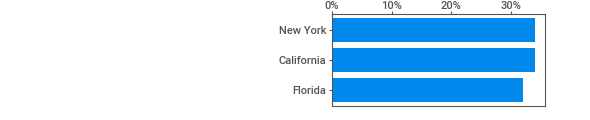
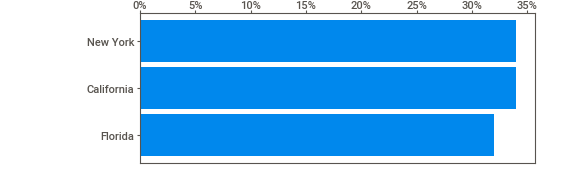
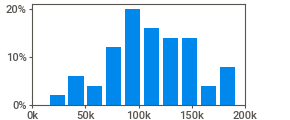
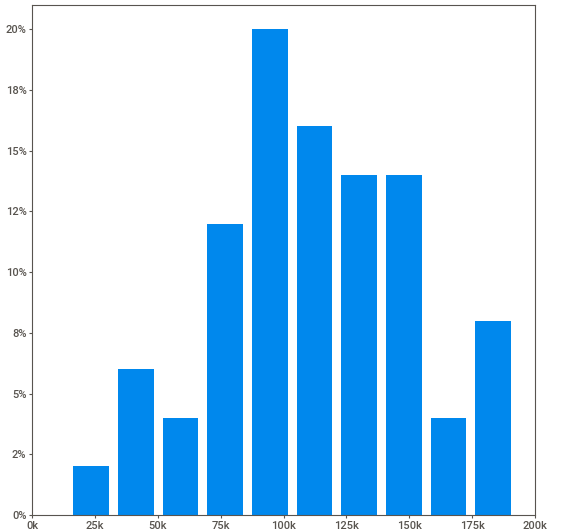
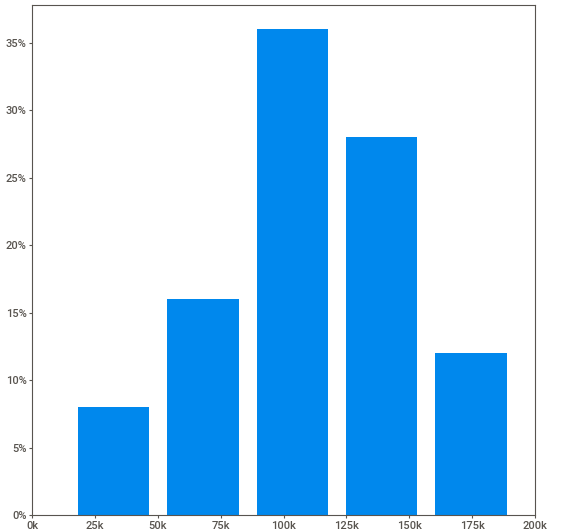
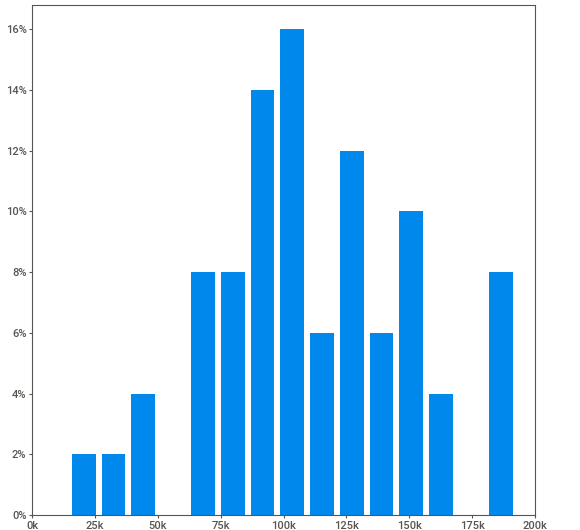
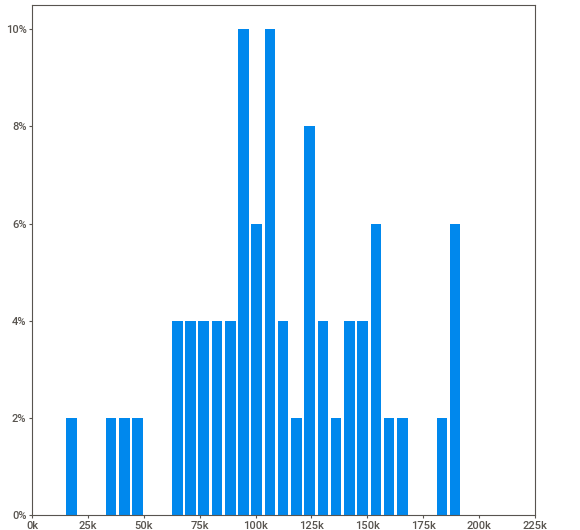
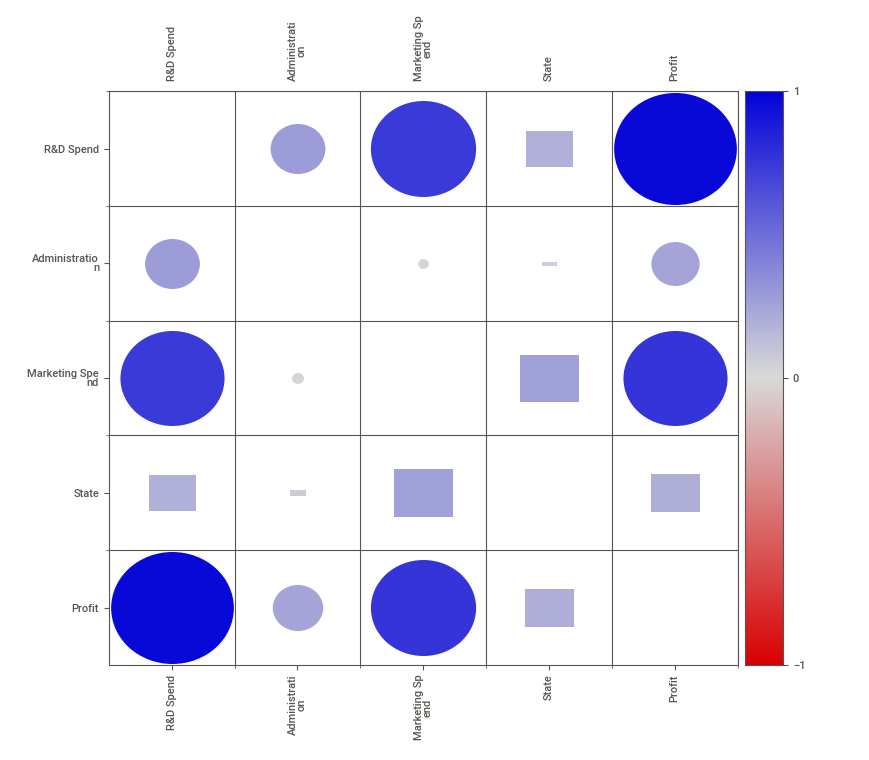
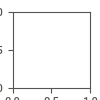

In [4]:
sweet_report = sv.analyze(df)
sweet_report.show_notebook(w=900, h=500, scale=0.8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

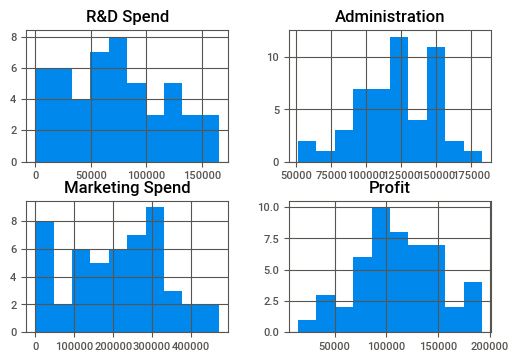

In [8]:
df.hist()
plt.show()

<AxesSubplot:>

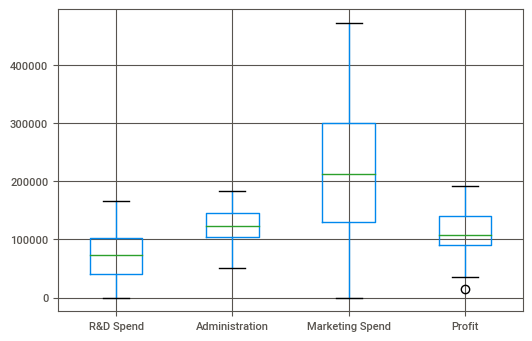

In [9]:
df.boxplot()

<AxesSubplot:>

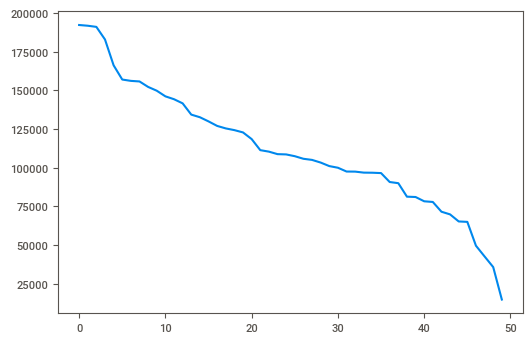

In [10]:
df["Profit"].plot()

In [11]:
Q25per=df["Profit"].quantile(0.25)
Q75per=df["Profit"].quantile(0.75)
IQR = Q75per - Q25per
IQR

49627.07499999998

In [12]:
Q3 = Q75per + 1.5 * IQR
Q1 = Q25per - 1.5 * IQR

In [13]:
df[(df["Profit"] < Q1) |  (df["Profit"] > Q3)]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [15]:
df1 =df.copy()
print(df1)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [16]:
df = pd.get_dummies(df , columns = ["State"])
df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [18]:
# df1["R&D Spend"] = df["R&D Spend"].replace(0,df["R&D Spend"].mean())
# df1["Marketing Spend"] = df["Marketing Spend"].replace(0,df["R&D Spend"].mean())
# df1["Profit"] = df["Profit"]
# df1["Administration"] =df["Administration"]


In [19]:
x1 = df["R&D Spend"]
x2 = df["Administration"] 
x3 = df["Marketing Spend"]
x4 = df["State_California"]
x5 = df["State_Florida"]
x6 = df["State_New York"]
y1 = df["Profit"]

In [20]:
# Variable = {"No Transformation" : {"x1" : x1, "x2" : x2, "x3" : x3 , "x4" : x4, "x5" : x5, "x6" : x6 ,"y" : y1},
#             "Log-Lin-Transformation" : {"x1" : np.log(x1) ,"x2" :np.log(x2) , "x3" : np.log(x3) ,"x4" : np.log(x4),"x5" : np.log(x5), "x6" : np.log(x6) , "y" : y1},
# #             "Log-Log-Transformation" : {"x1" : np.log(x1) ,"x2" : np.log(x2) , "x3" : np.log(x3) , "y" : np.log(y1)},
# #             "Lin-Log-Transformation" : {"x1" : x1, "x2" : x2, "x3" : x3 , "y" : np.log(y1)},
# #             "SquareRoot-Tran(X)" : {"x1" : np.sqrt(x1), "x2" : np.sqrt(x2), "x3" :np.sqrt(x3), "y" : y1},
# #             "SquareRoot-Tran(Y)" : {"x1" : x1, "x2" : x2, "x3" : x3, "y" : np.sqrt(y1)},
# #             "Square-Root-Tran-X-Y" : {"x1" : np.sqrt(x1), "x2" : np.sqrt(x2), "x3" :np.sqrt(x3), "y" : np.sqrt(y1)},
# #             "Inverse-Model" : {"x1" : 1/x1 , "x2" : 1/x2 , "x3" : 1/x3 , "y" : y1},
# #             "S-Curve_MOdel"  : {"x1" : (1/x1) , "x2" : (1/x2) , "x3" : (1/x3), "y" : np.log(y1)}}

In [21]:
Variable = {"No Transformation" : {"x1" : x1, "x2" : x2, "x3" : x3 , "x4" : x4, "x5" : x5, "x6" : x6 ,"y" : y1},
            "Square-Root-Tran-X-Y" : {"x1" : np.sqrt(x1), "x2" : np.sqrt(x2), "x3" :np.sqrt(x3), "x4" :np.sqrt(x4),"x5" :np.sqrt(x5) , "x6" :np.sqrt(x6) ,"y" : np.sqrt(y1)},
            "SquareRoot-Tran(X)" : {"x1" : np.sqrt(x1), "x2" : np.sqrt(x2), "x3" :np.sqrt(x3), "x4" :np.sqrt(x4),"x5" :np.sqrt(x5) , "x6" :np.sqrt(x6), "y" : y1},
            "SquareRoot-Tran(Y)" : {"x1" : x1, "x2" : x2, "x3" : x3, "x4" : x4, "x5" : x5, "x6" : x6, "y" : np.sqrt(y1)}}

In [22]:
# Creating the models
R_square1=[] # Empty list for storing the R Square of all the models
R_square_Adj1 = [] # Empty list for storing the Adjusted R Square of all the models
MSE1 = [] # Empty list for storing the MSE of all the models

for key, val in Variable.items():
     print('\033[1m' + '\033[4m' + key,":" + '\033[0m',"\n\n") #model name
     x1 = val['x1']
     x2 = val['x2'] 
     x3 = val['x3']
     x4 = val['x4']
     x5 = val['x5']
     x6 = val['x6']
     y1 = val['y']
    
     model1 = smf.ols('y1~x1+x2+x3+x4+x5+x6', data=df1).fit() #model fitting
     print(model1.summary(),"\n\n")
    

     R_square1.append(model1.rsquared)
     R_square_Adj1.append(model1.rsquared_adj)
     MSE1.append(model1.mse_model)

No Transformation : 


                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.34e-27
Time:                        09:12:25   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.

In [23]:
# Printing the results from all the models
Models1 = Variable.keys()
joined1 = list(zip(Models1, R_square1, R_square_Adj1, MSE1))
Results1 = pd.DataFrame(joined1, columns=['Models', 'R-Square', 'Adjusted R-Square','MSE'])
Results1

,Models,R-Square,Adjusted R-Square,MSE
0,No Transformation,0.950752,0.945156,1.513690e+10
1,Square-Root-Tran-X-Y,0.931286,0.923478,3.841633e+04
2,SquareRoot-Tran(X),0.908514,0.898117,1.446441e+10
3,SquareRoot-Tran(Y),0.896162,0.884362,3.696743e+04


> **We will use Model 1 of No transformation because of high R-square and Adjusted R-square value and low MSE**

In [25]:
model = smf.ols('y1~x1+x2+x3+x4+x5+x6', data=df).fit() #model fitting
print(model.summary())
    

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     75.95
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.65e-20
Time:                        09:12:26   Log-Likelihood:                -222.44
No. Observations:                  50   AIC:                             456.9
Df Residuals:                      44   BIC:                             468.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.8597     11.859     14.408      0.0

### Slope of the line for co-efficients:

>H0:  regression coefficients are insignificant

>H1: regression coefficients are significant


In [26]:
model.params

Intercept    1.708597e+02
x1           1.252310e-03
x2          -3.793917e-07
x3           3.987616e-05
x4           5.459456e+01
x5           5.903784e+01
x6           5.722729e+01
dtype: float64

>Here all the β1 values are < 0.05 so we reject H0 and conclude that all the β1 values are insignificant.

### Testing Colinearity between variables:

>H0: The data are not correlated

>H1: The data are correlated


In [27]:
print(model.tvalues, '\n', model.pvalues)

Intercept    14.407975
x1           11.545465
x2           -0.003108
x3            0.995246
x4            9.534587
x5            9.263511
x6            9.847389
dtype: float64 
 Intercept    2.872264e-18
x1           6.623820e-15
x2           9.975345e-01
x3           3.250586e-01
x4           2.845173e-12
x5           6.697235e-12
x6           1.071277e-12
dtype: float64


>Here, All the p-values are < 0.05 for all the variables, so we reject H0 and conclude that the data are correlated.

In [28]:
Correlation = df.corr()
Correlation.style.background_gradient()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


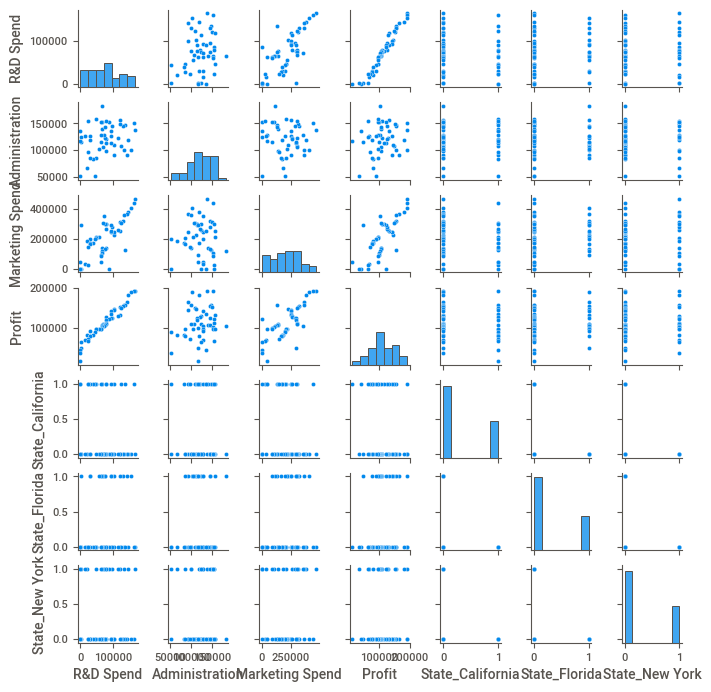

In [29]:
sns.pairplot(data = df, height = 1)  

# Detecting Multicollinearity with VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
4,9.443578,State_Florida
5,9.222969,State_New York
3,9.044052,State_California
0,2.495511,R&D Spend
2,2.416797,Marketing Spend
1,1.177766,Administration


>VIF={1/{1-R^2}  :   As we see from the formula, greater the value of R-squared, greater is the VIF.

>Generally, If VIF above 20 indicates a high multicollinearity.

>here all the values are less than 20 , so there is no multicollinearity or we reject H0 and conclude that the regression co-efficients are significant .

### Assumption about the errors for multiple linear regression  :

>1. The Means of the Error should be 0.

>2. No pattern inside the Regression plot , it should be completely random.

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


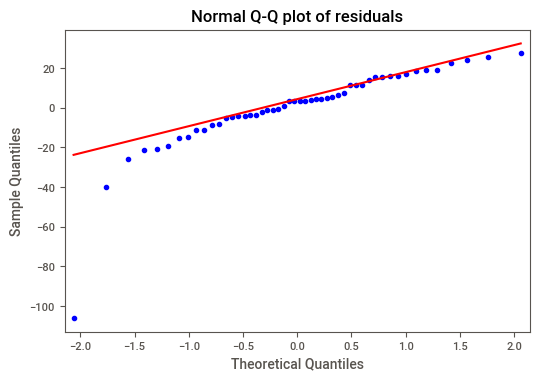

In [55]:
import statsmodels.api as sm

qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [62]:
list(np.where(model.resid>10))

[array([10, 11, 12, 13, 16, 19, 20, 25, 34, 35, 36, 37, 38, 40, 43, 45],
       dtype=int64)]

In [61]:
model.resid.mean()

7.488486630791158e-10

# Residual Plot for Homoscedasticity

In [57]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

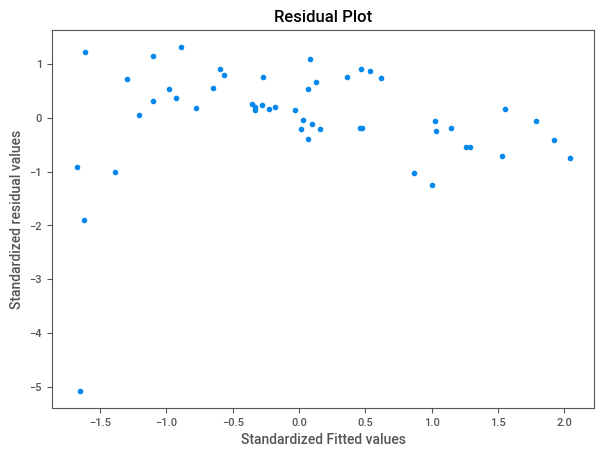

In [66]:
plt.figure(figsize=(7,5))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

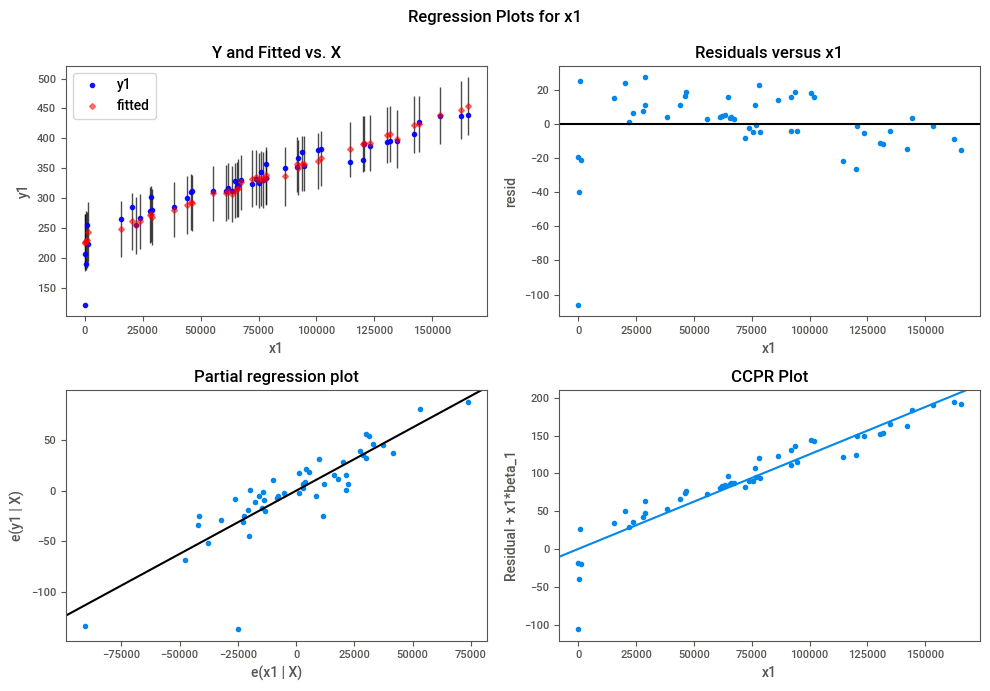

In [74]:
fig = plt.figure(figsize=(10,7))
fig = sm.graphics.plot_regress_exog(model, "x1", fig=fig)
plt.show()

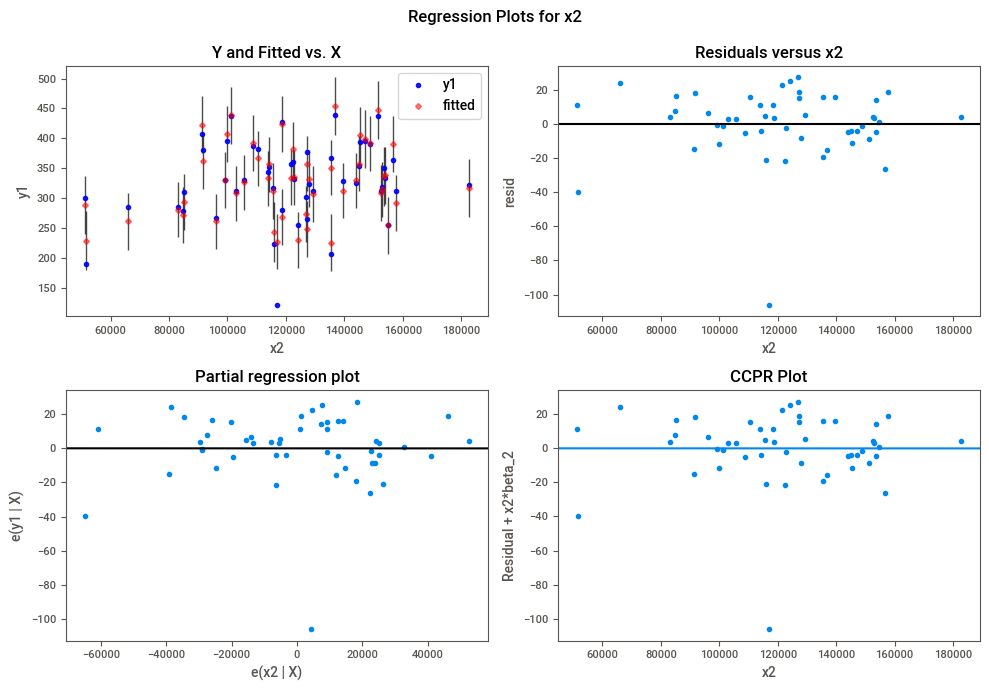

In [73]:
fig = plt.figure(figsize=(10,7))
fig = sm.graphics.plot_regress_exog(model, "x2", fig=fig)
plt.show()

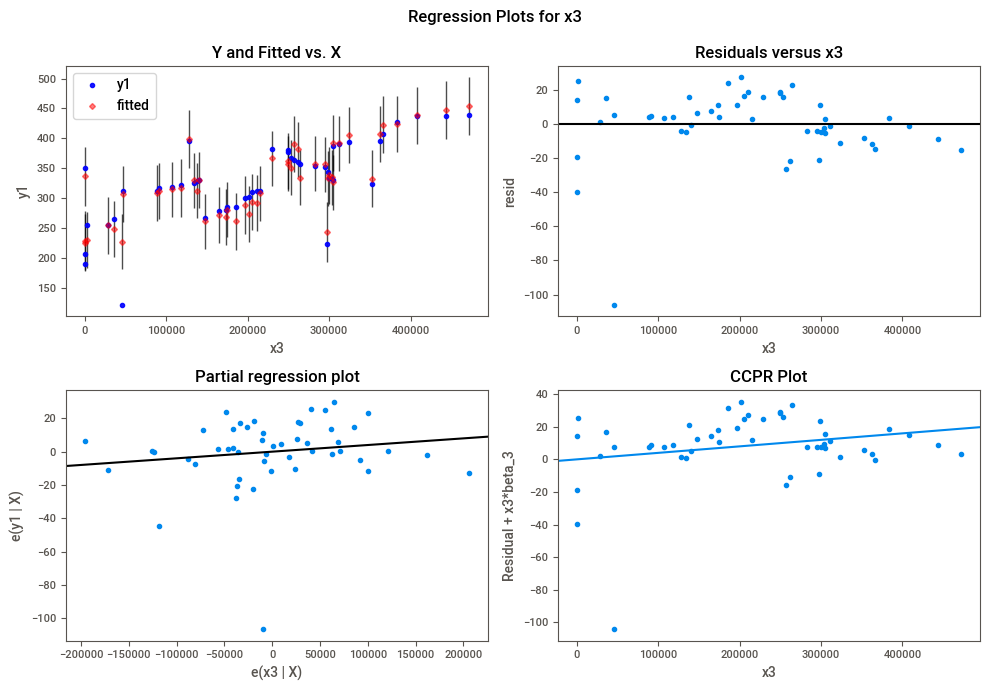

In [75]:
fig = plt.figure(figsize=(10,7))
fig = sm.graphics.plot_regress_exog(model, "x3", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

### Cook's Distance


In [70]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

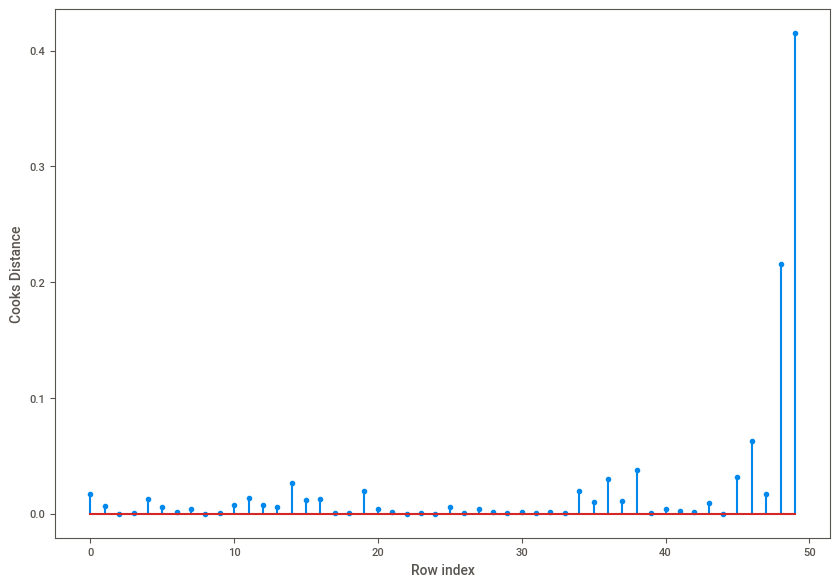

In [87]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(df)), np.round(c, 10))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [89]:
#value , position of value
(np.argmax(c),np.max(c))

(49, 0.4149034191041425)

In [92]:
df.shape

(50, 7)

In [93]:
df.shape[1] ,df.shape[0] 

(7, 50)

In [78]:
k = df.shape[1] # columns
n = df.shape[0] # rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

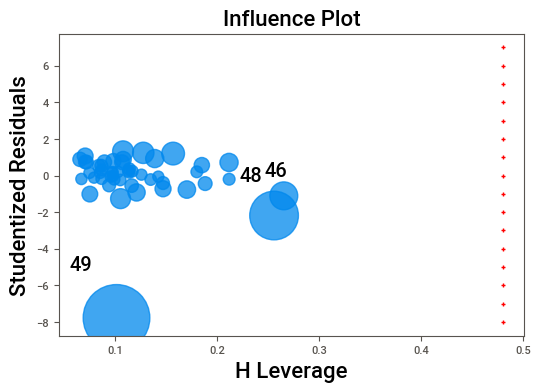

In [86]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-8,8)]
x=[leverage_cutoff for i in range(16)]
plt.plot(x,y,'r+')

plt.show()

<b>
<div  style="color:white;
           background-color:green;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:1px"> 
    <p style="padding: 10px;color:white;">
     </p>
    <center> ----:____  Thank You  ____:----   </center>  
       </div>
</b>